In [1]:
import pandas as pd
from gensim.models import Word2Vec
import re
from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer('english')
import nltk
nltk.download('wordnet')
import numpy as np
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gigimancinelli./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
criminality = ['theft', 'deviance', 'indictment', 'criminalization', 'guilt', 'government', 'tort', 
               'criminalness', 'criminalism', 'imprisonment', 'punishment', 'law', 'banditry', 'lawlessness', 
               'statutory', 'illegality', 'murder', 'immorality', 'sectarianism', 'dishonesty', 
               'impunity', 'criminalisation', 'brutality', 'thuggery', 'trial', 'recklessness', 'militancy', 
               'decriminalization', 'sentence', 'bigotry', 'extremism', 'viciousness', 'duplicity', 
               'xenophobia', 'mysonygy', 'stupidity', 'hypocrisy', 'irresponsibility', 'racism',
               'illegalities', 'coercion', 'vigilantism', 'imprisonment', 'plaintiff', 'criminology', 
               'felony', 'desertion', 'charge', 'power', 'wrong']
mental = ['schizophrenia', 'depression', 'bipolar', 'disorder', 'antisocial', 'personality', 'psychosis', 
          'psychotherapy', 'dementia', 'psychopathy', 'disability', 'anxiety', 'illness', 'alcoholism', 'brain', 
          'diagnosis', 'mind', 'symptoms', 'delusions', 'hallucinations', 'chronic', 'attention', 'deficit', 
          'hyperactivity', 'psychiatrists', 'disease', 'stress', 'epilepsy', 'agoraphobia', 'suffering', 
          'dysthymia', 'hypomania', 'sclerosis', 'psychiatric', 'psychological', 'disabilities', 'paraphilia', 
          'ocd', 'psychotic', 'syndrome', 'delusional', 'community', 'eating', 'disorder', 'anorexia', 'bulimia', 
          'nervosa', 'sickness', 'substance', 'abuse']

In [3]:
len(criminality)

50

In [4]:
len(mental)

50

In [5]:
model = Word2Vec.load("./model/word2vec_before_floyd.model")

In [6]:
df = pd.read_csv("./data/mpv_clean_pattern_stop.csv")

In [7]:
df.head()

,Unnamed: 0,name,gender,race,age,date,after_Floyd,city,state,cause_of_death,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,initial_reason,text,authors,TextColumn,cleaned,sentences
0,0,Clyde E. Young,Male,White,28.0,2024-02-22,True,West Alton,MO,Gunshot,...,NaN,Used Weapon,Not Fleeing,NaN,Murder (suspect),['A Godfrey man who had been charged with murd...,"[['Mike Koziatek'], []]",a godfrey man who had been charged with murd...,godfrey man who had been charged with murder i...,"[['godfrey', 'man', 'charg', 'murder', 'shoot'..."
1,1,Clyde E. Young,Male,White,28.0,2024-02-22,True,West Alton,MO,Gunshot,...,NaN,Used Weapon,Not Fleeing,NaN,Murder (suspect),"['The man, identified as Clyde Young, was char...","[['Mike Koziatek'], []]",the man identified as clyde young was char...,the man identified as clyde young was charged ...,"[['man', 'identifi', 'clyde', 'young', 'charg'..."
2,2,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,"['DESOTO COUNTY, Miss. (WMC) - Mississippi Bur...","[[], ['Lakiya Scott'], []]",desoto county miss wmc mississippi bur...,desoto county miss wmc mississippi bureau of i...,"[['desoto', 'counti', 'miss', 'wmc', 'mississi..."
3,3,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,['Close Get email notifications on {{subject}}...,"[[], ['Lakiya Scott'], []]",close get email notifications on subject ...,close get on subject are only sent and only if...,"[['close', 'get', 'subject', 'sent', 'new']]"
4,4,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,['The Carlos Moore Law Group said it has been ...,"[[], ['Lakiya Scott'], []]",the carlos moore law group said it has been ...,the carlos moore law group said it has been re...,"[['carlo', 'moor', 'law', 'group', 'said', 're..."


In [8]:
states = pd.read_csv("./data/full_dataset_mpv.csv",low_memory=False)
most_violent_states = states.groupby('state').count().sort_values('name', ascending=False).index[:3]
most_violent_states = most_violent_states.tolist()

In [9]:
most_violent_states.append('MN')
df = df[(df.after_Floyd == 0) & (df.state.isin(most_violent_states))]
df.head()

,Unnamed: 0,name,gender,race,age,date,after_Floyd,city,state,cause_of_death,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,initial_reason,text,authors,TextColumn,cleaned,sentences
9541,9541,Reymar Gagarin,Male,Native Hawaiian and Pacific Islander,35.0,2020-05-25,False,Modesto,CA,Gunshot,...,Toy Weapon,Attack,Not Fleeing,Yes,Suspicious Person,['One man was killed after an officer-involved...,"[['Kcra Staff', 'Https', 'Www.Facebook.Com']]",one man was killed after an officer involved...,one man was killed after an officer involved s...,"[['one', 'man', 'kill', 'offic', 'involv', 'sh..."
9542,9542,George Floyd,Male,Black,46.0,2020-05-25,False,Minneapolis,MN,Physical Restraint,...,No Object,Other,Not Fleeing,Yes,Forged check,['The FBI and authorities in Minnesota have la...,"[['Kenya Evelyn'], []]",the fbi and authorities in minnesota have la...,the fbi and authorities in minnesota have laun...,"[['fbi', 'author', 'minnesota', 'launch', 'inv..."
9543,9543,George Floyd,Male,Black,46.0,2020-05-25,False,Minneapolis,MN,Physical Restraint,...,No Object,Other,Not Fleeing,Yes,Forged check,[''],"[['Kenya Evelyn'], []]",,NaN,[]
9557,9557,Stoney Ramirez,Male,Hispanic,NaN,2020-05-20,False,Hayward,CA,Gunshot,...,Vehicle,Attack,NaN,Yes,Traffic Violation,['A man in his 20s died in an officer-involved...,[[]],a man in his XXXXXXs died in an officer invo...,man in his died in an officer involved shootin...,"[['man', 'die', 'offic', 'involv', 'shoot', 'h..."
9558,9558,Name Withheld,Male,Unknown race,NaN,2020-05-20,False,Viera,FL,Gunshot,...,Gun,Attack,Not Fleeing,No,erratic behavior (suicidal),"['BREVARD COUNTY, Fla. – The Brevard County Sh...","[['Erin Dobrzyn', 'Jerry Askin']]",brevard county fla the brevard county sh...,brevard county fla the brevard county sheriff ...,"[['brevard', 'counti', 'fla', 'brevard', 'coun..."


In [10]:
def create_embedding(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = text.strip()
    embeddings = [model.wv[word] for word in text.split()]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [11]:
for state in most_violent_states:
    df_state = df[df.state == state]
    df.loc[:,f'emb_{state}'] = df_state.sentences.apply(create_embedding)

In [12]:
df.allegedly_armed.unique()

array(['Unarmed/Did Not Have Actual Weapon', 'Vehicle', 'Allegedly Armed',
       'Unclear'], dtype=object)

In [13]:
df.iloc[0].emb_CA

array([-0.3679473 ,  0.32287943,  0.1252787 ,  0.13544944, -0.16987342,
       -0.07848951, -0.33032185,  0.35187235, -0.81223065, -0.54547834,
       -0.35864922,  0.42512488, -0.01866508,  0.7889193 ,  0.42515412,
       -0.4334894 ,  0.6381969 , -0.4539734 , -0.26614377, -0.01775541,
       -0.4638831 ,  0.27686396, -0.5346955 ,  0.7581445 ,  0.97852176,
       -0.36869565, -0.39785084,  0.03029194, -0.01708296, -0.24162965,
       -0.8712927 ,  0.17923881, -0.79671216,  0.67996675,  0.42138928,
        0.00903549,  0.2927024 , -0.8051558 ,  0.1718284 ,  0.66886914,
        0.56173027, -0.62983423,  1.065963  , -0.49870175,  0.08697744,
        0.27949527,  0.89651686,  0.8642262 ,  0.23378254, -0.19091521,
        0.02444307, -0.350121  , -0.40412512, -0.25478232,  0.5579426 ,
       -0.06154435, -0.7685    ,  0.33099902, -0.4993217 ,  0.73295516,
       -0.16260976, -0.312042  , -0.21779776, -0.03287746,  0.0189744 ,
       -0.21582994,  0.2826874 , -0.5876288 , -0.28638208,  0.12

In [14]:
def create_embedding_dimension_lem(l):
    lemmatized = [lemmatizer.lemmatize(w) for w in l] 
    embeddings = [model.wv[word] for word in lemmatized if word in model.wv]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [15]:
def create_embedding_dimension(l):
    stemmed = [stemmer.stem(w) for w in l] 
    embeddings = [model.wv[word] for word in stemmed if word in model.wv]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [16]:
criminal_dimension = create_embedding_dimension(criminality)
mental_dimension = create_embedding_dimension(mental)

In [17]:
criminal_dimension_lem = create_embedding_dimension_lem(criminality)
mental_dimension_lem = create_embedding_dimension_lem(mental)

In [18]:
criminal_dimension

array([ 0.16450872, -0.5754865 , -0.23153691, -0.01478629, -0.35141757,
        0.60716   ,  0.03755226, -0.02729095,  0.06187922,  0.20751795,
        0.06461097,  0.65000856,  0.02833593,  0.43889856, -0.06187674,
       -0.10422292,  0.2400769 ,  0.1459391 , -0.31555203, -0.26375467,
        0.38144684,  0.02127731, -0.3139545 ,  0.7098815 ,  0.21419723,
       -0.1659213 , -0.27394807, -0.2232126 , -0.45663685,  0.04503582,
        0.20316668, -0.2708475 ,  0.08834095, -0.04616502, -0.10659347,
        0.21436906,  0.24270985, -0.27659386,  0.11043117,  0.16319868,
        0.28631097, -0.18019697,  0.5817863 , -0.01376015, -0.42161602,
        0.07092178,  0.2667014 , -0.03237163, -0.03101639, -0.10037074,
       -0.09763314, -0.54776347,  0.01986785,  0.21024032, -0.01625049,
        0.05152525, -0.1717684 ,  0.10497241, -0.18291683,  0.03406792,
       -0.20309687,  0.19475761, -0.26603618, -0.05790906, -0.33787602,
       -0.0632514 , -0.1514766 , -0.08661533, -0.36230874, -0.15

In [19]:
mental_dimension

array([-0.02536458, -0.13179745, -0.23405544,  0.10342605, -0.26183134,
        0.4039547 ,  0.39049435,  0.25825715, -0.01933487, -0.08694631,
        0.093891  ,  0.37841862,  0.06689981,  0.09644082,  0.07104122,
       -0.15498051,  0.3004254 , -0.04578625,  0.02012766, -0.2388821 ,
        0.5850873 , -0.02011888,  0.07660916,  0.37409458, -0.24882817,
        0.30912018, -0.37777427, -0.06455736, -0.22267419, -0.14666554,
        0.05574656, -0.17977662, -0.08084849, -0.2684792 ,  0.10461606,
        0.24892792, -0.08421971, -0.20174411,  0.08974564,  0.23545484,
        0.23178698, -0.2748743 ,  0.3894324 , -0.09778746, -0.17312132,
        0.31738997,  0.17797728,  0.05830799,  0.07919475,  0.08225547,
       -0.31325617, -0.46771994, -0.10921598, -0.01445774,  0.1482184 ,
       -0.09530978, -0.13221039, -0.06766609, -0.16415673,  0.35737067,
       -0.26081952, -0.01121674, -0.1699271 , -0.03266311, -0.21063502,
        0.09975211,  0.06435907,  0.00562243, -0.4401948 ,  0.15

In [20]:
def cosine_similarity(v1, v2):
    dot_ = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 > 0 and norm2 > 0:
        return dot_ / (norm1 * norm2)
    else:
        return 0.0

In [21]:
cosine_similarity(criminal_dimension, mental_dimension)

0.6429258

In [22]:
cosine_similarity(criminal_dimension_lem, mental_dimension_lem)

0.56635743

In [23]:
for state in most_violent_states:
    df.loc[:,f'cosine_{state}_criminal'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(criminal_dimension, x))
    df.loc[:,f'cosine_{state}_mental'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(mental_dimension, x))

In [24]:
for state in most_violent_states: 
    df.loc[:,f'cosine_{state}_criminal_lem'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(criminal_dimension_lem, x))
    df.loc[:,f'cosine_{state}_mental_lem'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(mental_dimension_lem, x))

In [25]:
from collections import defaultdict


def extract_sign_mental(col):
    if col == 'Yes' or col == 'Drug or Alcohol Use' or col == 'History of Drug or Alcohol Use':
        return 1
    else:
        return 0
    
def extract_sign_armed(col):
    if col == 'Allegedly Armed' or col == 'Vehicle':
        return 1
    else:
        return 0

def code_to_name(state_code):
    state_names = { 'MN': 'Minnesota',  'CA': 'California', 'TX': 'Texas', 'FL': 'Florida'}
    return state_names[state_code]  

def compare_proxy(method): 
    
    ''' method: 'stemmer' or 'lemmatizer' 
    Returns the proxy and the average bias for each of the most violent states'''
    
    distances = defaultdict(dict)   
    for state in most_violent_states: 
        if method == 'stemmer': 
            #create average criminal and mental dimension
            average_criminal_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            average_mental_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_mental'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_mental_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_mental'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            df[f'mental_{state}'] = df['signs_of_mental_illness'].apply(extract_sign_mental)
            df[f'criminal_{state}'] = df['allegedly_armed'].apply(extract_sign_armed)
            
            proxy_criminal_white = df[(df.race == 'White') & (df.state == state)][f'criminal_{state}'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'criminal_{state}'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            proxy_mental_white = df[(df.race == 'White') & (df.state == state)][f'mental_{state}'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            
            proxy_mental_black = df[(df.race == 'Black') & (df.state == state)][f'mental_{state}'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            #calculate the distance between the proxies
            distances[state] = {'criminal_bias_white': average_criminal_white*proxy_criminal_white, 'criminal_bias_black': average_criminal_black*proxy_criminal_black,
                    'mental_bias_white': average_mental_white*proxy_mental_white, 'mental_bias_black':  average_mental_black*proxy_mental_black}
            
            print(f"State: {code_to_name(state)}, method: {method}")
            print(f"Proportion of white victims armed: {proxy_criminal_white}. Criminal bias in articles for white victims: {average_criminal_white}")
            print(f"Proportion of black victims armed: {proxy_criminal_black}. Criminal bias in articles for black victims: {average_criminal_black}")
            print(f"Proportion of white victims with signs of mental illness: {proxy_mental_white}. Mental bias in articles for white victims: {average_mental_white}")
            print(f"Proportion of black victims with signs of mental illness: {proxy_mental_black}. Mental bias in articles for black victims: {average_mental_black}")
            df.drop(columns=[f'mental_{state}', f'criminal_{state}'], inplace=True)
        else: 
            #create average criminal and mental dimension
            average_criminal_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            average_mental_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_mental_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            df[f'mental_{state}_lem'] = df['signs_of_mental_illness'].apply(extract_sign_mental)
            df[f'criminal_{state}_lem'] = df['allegedly_armed'].apply(extract_sign_armed)
            
            proxy_criminal_white = df[(df.race == 'White') & (df.state == state)][f'criminal_{state}_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'criminal_{state}_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            proxy_mental_white = df[(df.race == 'White') & (df.state == state)][f'mental_{state}_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_mental_black = df[(df.race == 'Black') & (df.state == state)][f'mental_{state}_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            #calculate the distance between the proxies
            distances[state] = {'criminal_bias_white': average_criminal_white*proxy_criminal_white, 'criminal_bias_black': average_criminal_black*proxy_criminal_black,
                                'mental_bias_white': average_mental_white*proxy_mental_white, 'mental_bias_black':  average_mental_black*proxy_mental_black}
            
            print(f"State: {code_to_name(state)}, method: {method}")
            print(f"Proportion of white victims armed: {proxy_criminal_white}. Criminal bias in articles for white victims: {average_criminal_white}")
            print(f"Proportion of black victims armed: {proxy_criminal_black}. Criminal bias in articles for black victims: {average_criminal_black}")
            print(f"Proportion of white victims with signs of mental illness: {proxy_mental_white}. Mental bias in articles for white victims: {average_mental_white}")
            print(f"Proportion of black victims with signs of mental illness: {proxy_mental_black}. Mental bias in articles for black victims: {average_mental_black}")
            df.drop(columns=[f'mental_{state}_lem', f'criminal_{state}_lem'], inplace=True)
    return distances

In [26]:
stem_biases = compare_proxy('stemmer')
stem_biases

State: California, method: stemmer
Proportion of white victims armed: 0.6678321678321678. Criminal bias in articles for white victims: 0.47282463291308263
Proportion of black victims armed: 0.536723163841808. Criminal bias in articles for black victims: 0.49148121232030084
Proportion of white victims with signs of mental illness: 0.35664335664335667. Mental bias in articles for white victims: 0.36673865337055045
Proportion of black victims with signs of mental illness: 0.20903954802259886. Mental bias in articles for black victims: 0.37379489813820793
State: Texas, method: stemmer
Proportion of white victims armed: 0.7341772151898734. Criminal bias in articles for white victims: 0.46956891849448407
Proportion of black victims armed: 0.6554621848739496. Criminal bias in articles for black victims: 0.5043169154840357
Proportion of white victims with signs of mental illness: 0.31645569620253167. Mental bias in articles for white victims: 0.38528241103963007
Proportion of black victims wit

defaultdict(dict,
            {'CA': {'criminal_bias_white': 0.31576749960279293,
              'criminal_bias_black': 0.26378935124535924,
              'mental_bias_white': 0.1307949043489376,
              'mental_bias_black': 0.07813791655996437},
             'TX': {'criminal_bias_white': 0.344746800920001,
              'criminal_bias_black': 0.330560667292057,
              'mental_bias_white': 0.1219248136201361,
              'mental_bias_black': 0.04717795258398051},
             'FL': {'criminal_bias_white': 0.3433908066014455,
              'criminal_bias_black': 0.3256905922147963,
              'mental_bias_white': 0.14739683260112654,
              'mental_bias_black': 0.057491153426965085},
             'MN': {'criminal_bias_white': 0.3800868326425552,
              'criminal_bias_black': 0.413495167882906,
              'mental_bias_white': 0.20363327208906412,
              'mental_bias_black': 0.12694046237609455}})

In [31]:
import matplotlib.pyplot as plt

def plot_bias(biases, method = 'stemmer'): 
    # Create a DataFrame from the dictionary
    data = pd.DataFrame(biases).T

    # Plotting using DataFrame's plot method
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', ax=ax, color=['#FF9999', '#9999FF', '#FFCC99', '#99CCFF'])
    ax.set_title('Comparison of Bias Metrics Across States before Floyd')
    ax.set_xlabel('State')
    ax.set_ylabel(f'Bias Value with {method}')
    ax.legend(title='Metric')

    plt.show()


    
    

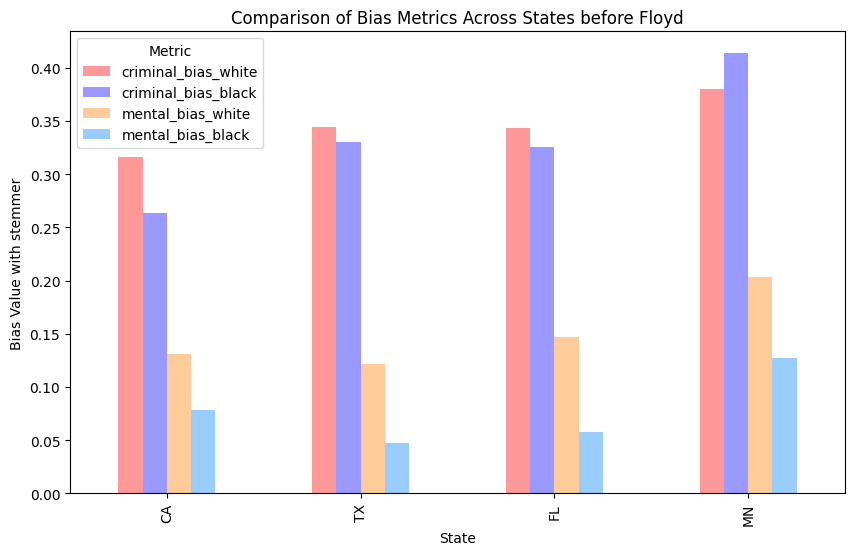

In [32]:
plot_bias(stem_biases)

In [29]:
lem_biases = compare_proxy('lemmatizer')
lem_biases

State: California, method: lemmatizer
Proportion of white victims armed: 0.6678321678321678. Criminal bias in articles for white victims: 0.44766170396046207
Proportion of black victims armed: 0.536723163841808. Criminal bias in articles for black victims: 0.46583445361778564
Proportion of white victims with signs of mental illness: 0.35664335664335667. Mental bias in articles for white victims: 0.44766170396046207
Proportion of black victims with signs of mental illness: 0.20903954802259886. Mental bias in articles for black victims: 0.46583445361778564
State: Texas, method: lemmatizer
Proportion of white victims armed: 0.7341772151898734. Criminal bias in articles for white victims: 0.45199418822421306
Proportion of black victims armed: 0.6554621848739496. Criminal bias in articles for black victims: 0.4882529400476888
Proportion of white victims with signs of mental illness: 0.31645569620253167. Mental bias in articles for white victims: 0.45199418822421306
Proportion of black victi

defaultdict(dict,
            {'CA': {'criminal_bias_white': 0.2989628862113575,
              'criminal_bias_black': 0.25002414177225785,
              'mental_bias_white': 0.15965557274114384,
              'mental_bias_black': 0.0973778236376162},
             'TX': {'criminal_bias_white': 0.33184383439246024,
              'criminal_bias_black': 0.32003133885478763,
              'mental_bias_white': 0.14303613551399147,
              'mental_bias_black': 0.05744152235855163},
             'FL': {'criminal_bias_white': 0.33369241249989734,
              'criminal_bias_black': 0.3180589040120443,
              'mental_bias_white': 0.1613214974337252,
              'mental_bias_black': 0.06422343254089356},
             'MN': {'criminal_bias_white': 0.3605831742286682,
              'criminal_bias_black': 0.4026553550631636,
              'mental_bias_white': 0.2326343059539795,
              'mental_bias_black': 0.1483467097601129}})

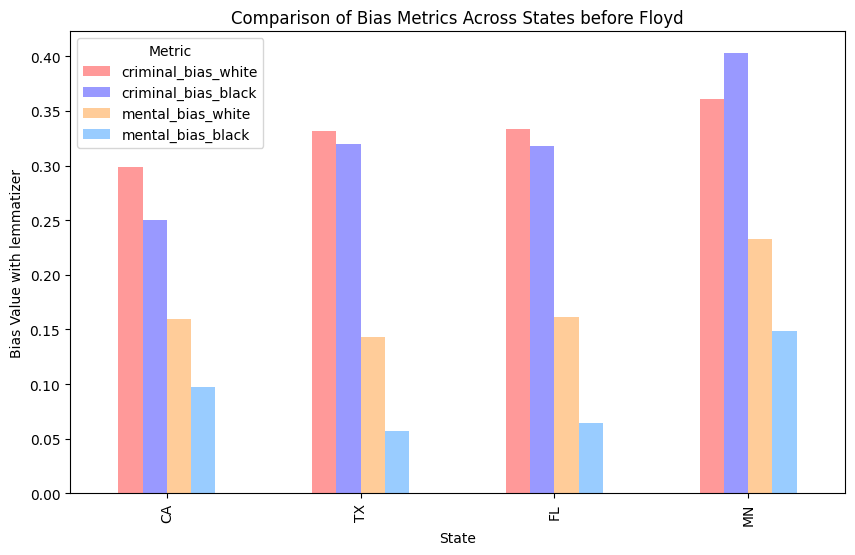

In [33]:
plot_bias(lem_biases, method = 'lemmatizer')